In [1]:
# We load the competition data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting Optimal Fertilizers

### Playground Series - Season 5, Episode 6

### Your Goal: 

Your objective is to select the best fertilizer for different weather, soil conditions and crops.

### Evaluation:

Submissions are evaluated according to the Mean Average Precision @ 3 (MAP@3).

### Submission File:

For each id in the test set, you may predict up to 3 Fertilizer Name values, with the predictions space delimited. The file should contain a header and have the following format:

id,Fertilizer Name 

750000,14-35-14 10-26-26 Urea

750000,14-35-14 10-26-26 Urea

etc

### Timeline:

Start Date - June 1, 2025

Entry Deadline - Same as the Final Submission Deadline

Team Merger Deadline - Same as the Final Submission Deadline

Final Submission Deadline - June 30, 2025

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

# Initial analysis

In [3]:
# We load the data

fertilizers_train = pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv", index_col="id")

In [4]:
fertilizers_train.shape

(750000, 9)

In [5]:
fertilizers_train.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


In [6]:
fertilizers_train.describe().style.background_gradient(cmap='Greens')

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
fertilizers_train.describe(exclude=np.number).T

,count,unique,top,freq
Soil Type,750000,5,Sandy,156710
Crop Type,750000,11,Paddy,85754
Fertilizer Name,750000,7,14-35-14,114436


In [8]:
fertilizers_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 57.2+ MB


We encountered a dataset with a categorical target and eight features, two of which are categorical and the rest numerical. We encountered a classification problem. Next, we will perform exploratory data analysis.

# EDA

We will start by establish the aesthetics of the graphics and creating a useful function to explore each variable in depth and graph its distribution.

In [9]:
# Establishing the seaborn aesthetic

sns.set_style("darkgrid")

In [10]:
# Function to view the data of each variable in detail

def detail_columns(data, column, chart_title):

    print(
        "Variable: ", column,
        "\nFormat: ", data[column].dtype,
        "\nNumber of null values: ", data[column].isnull().sum(),
        "\nUnique values: ", data[column].nunique(),
        "\nDistribution of values: \n", data[column].value_counts()
    )

    # We analyze the distribution of the data

    fig, axes = plt.subplots(figsize=(12, 4))
    
    sns.histplot(
        data=data, 
        x=column, 
        color="green",
        edgecolor="k",
        kde=True
    )
    
    plt.title(label=chart_title)
    plt.tight_layout()
    plt.show()

## Fertilizer Name (Target variable)

The variable contains the names of different types of fertilizers, possibly inorganic. Some are listed by number, representing the percentage of each component they contain. I'm sharing an information resource to explore the topic in more depth.

https://eos.com/blog/types-of-fertilizers/

Variable:  Fertilizer Name 
Format:  object 
Number of null values:  0 
Unique values:  7 
Distribution of values: 
 Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64


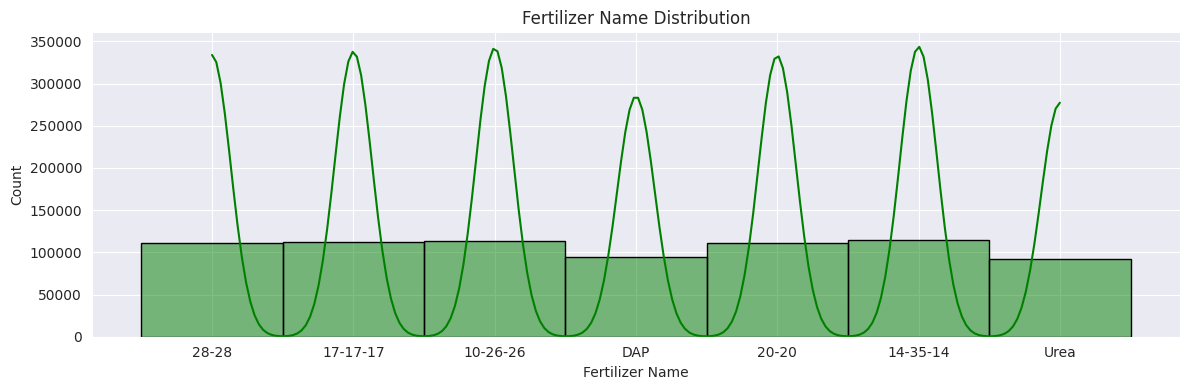

In [11]:
detail_columns(
    fertilizers_train,
    "Fertilizer Name",
    "Fertilizer Name Distribution"
)

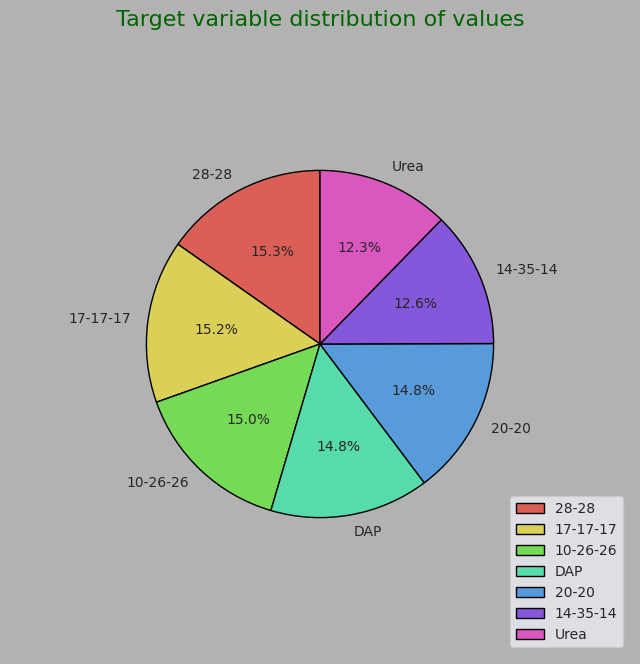

In [12]:
fig,ax = plt.subplots(figsize =(8, 10))
fig.set_facecolor("#b2b2b2")
fertilizer_values = ["28-28", "17-17-17", "10-26-26", "DAP", "20-20", "14-35-14", "Urea"]

ax.pie(
    fertilizers_train["Fertilizer Name"].value_counts(),
    labels=fertilizer_values,
    radius=0.7, 
    startangle=90, 
    autopct= "%1.1f%%",
    colors=sns.color_palette("hls",7),
    wedgeprops={'edgecolor' : "k"}
)

plt.title("Target variable distribution of values", color="darkgreen", fontsize=16)
plt.legend(loc="lower right", labels=fertilizer_values, fontsize=10)
plt.show()

We found a categorical target variable with seven unique values. We found no null or erroneous values. The distribution of values is balanced, with almost the same number of samples per value.

## Temparature

Temperature influences fertilizer selection and application due to its impact on soil processes and nutrient availability. Factors such as soil temperature, the plant's growth stage, and the specific fertilizer type must be considered.

Variable:  Temparature 
Format:  int64 
Number of null values:  0 
Unique values:  14 
Distribution of values: 
 Temparature
27    55228
35    54855
32    54656
30    53867
34    53788
38    53743
36    53725
26    53310
29    53198
33    53178
31    52924
25    52876
28    52431
37    52221
Name: count, dtype: int64


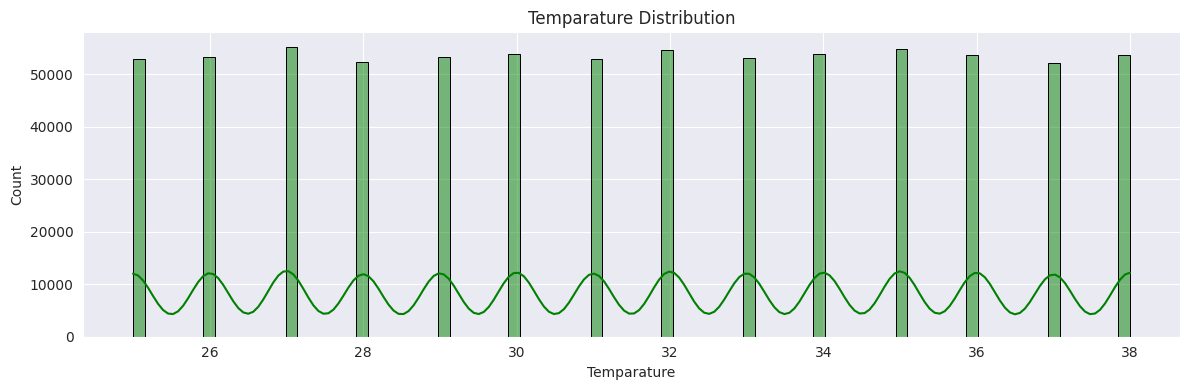

In [13]:
detail_columns(
    fertilizers_train,
    "Temparature",
    "Temparature Distribution"
)

We found no null or erroneous values. The variable has 14 unique values, ranging from 25 to 38 degrees, with an average temperature of around 31.5 degrees. We observed no outliers, with a nearly normal distribution.

## Humidity

Relative humidity is critical in fertilizer selection and management. Each fertilizer has a relative humidity (RH), which is the percentage of relative humidity at which it begins to absorb moisture.
Excessive humidity can cause fertilizers to form lumps or blocks, dissolve and leach nutrients, reducing fertilizer effectiveness and causing losses, and can also affect fertilizer mixability and cause undesirable chemical reactions.

Variable:  Humidity 
Format:  int64 
Number of null values:  0 
Unique values:  23 
Distribution of values: 
 Humidity
70    33745
53    33640
62    33617
71    33525
64    33446
52    33220
66    33197
67    33132
72    33027
61    32771
60    32596
65    32541
51    32530
55    32405
68    32388
57    32342
54    32246
56    31997
50    31946
59    31843
63    31674
69    31371
58    30801
Name: count, dtype: int64


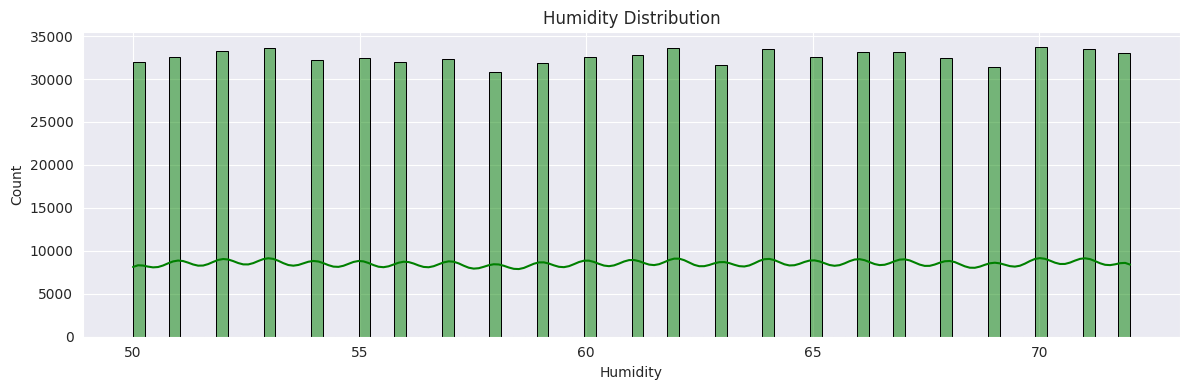

In [14]:
detail_columns(
    fertilizers_train,
    "Humidity",
    "Humidity Distribution"
)

We found a variable with a near-normal distribution, with a mean and median humidity of 61 percent, and a range of values between 50% and 72%. We also observed no extreme values. The variable did not present any null or erroneous data, with a total of 23 distinct values.

## Moisture

Moisture is the presence of a liquid, especially water, often in trace amounts, or water in any state (liquid, solid, or vapor) within a substance. Its measurement can be used in various contexts, including agriculture, construction, and food processing. Can be expressed as a percentage or in other units depending on the context (e.g., grams per cubic meter of air for humidity, moisture content of wood in construction). Essentially, humidity is a measure of moisture content in the atmosphere, particularly when referring to water vapor, while moisture is a broader term encompassing water in various forms (liquid, solid, or gas) present in different substances, including the air.

Variable:  Moisture 
Format:  int64 
Number of null values:  0 
Unique values:  41 
Distribution of values: 
 Moisture
61    19809
48    19386
47    19299
53    19270
46    19180
39    19163
51    19155
58    18867
45    18864
34    18829
52    18791
62    18748
64    18745
43    18700
33    18676
37    18604
57    18585
65    18450
60    18433
35    18290
54    18264
38    18243
49    18226
28    18199
63    18126
26    18123
40    17962
56    17904
29    17856
59    17837
44    17805
41    17700
27    17592
36    17573
55    17524
25    17514
42    17510
32    17386
30    17135
50    17027
31    16650
Name: count, dtype: int64


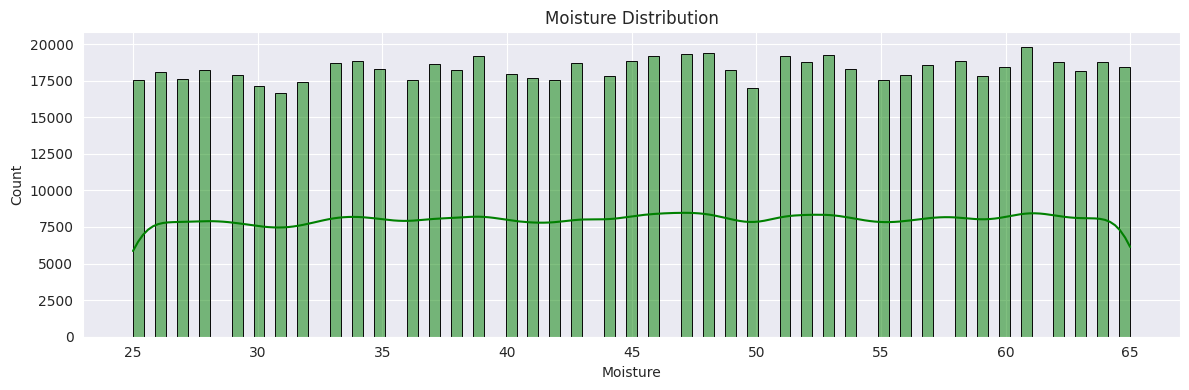

In [15]:
detail_columns(
    fertilizers_train,
    "Moisture",
    "Moisture Distribution"
)

Once again, we find a near-normal distribution, with a mean of 45 on average. The values range from 25 to 65, with no extreme values. The variable has 41 unique values and no null or erroneous data.

## Soil Type

Different soil types significantly influence fertilizer selection and effectiveness, affecting factors such as nutrient retention and availability, and the need for different types of fertilizers. Understanding your soil type helps you choose the right fertilizer for optimal growth. Essentially, soil type determines how fertilizers will interact and how effectively plants will absorb nutrients. Performing a soil test is crucial for determining your soil's specific needs and selecting the most appropriate fertilizer for your crops.

- Sandy Soils: These soils have poor water and nutrient retention, requiring more frequent, smaller fertilizer applications. Slow-release fertilizers and organic matter amendments can be helpful to increase nutrient availability.

- Clay Soils: While clay soils have high nutrient and water retention, they can become compacted, limiting root penetration and nutrient uptake. Proper soil aeration and potentially deeper tillage may be needed.

- Loamy Soils: Loam, with its balanced mix of sand, silt, and clay, is considered ideal for agriculture, providing optimal nutrient retention and availability. Balanced nutrient management plans are generally sufficient for this soil type.

- Red soil: while containing a mixture of clay and sand, is not naturally highly fertile. To improve fertility, organic and inorganic fertilizers are commonly used. Organic fertilizers include green manure, farmyard manure, and crop residues, while inorganic fertilizers can include calcium magnesium phosphate, potassium chloride, and urea.

- Black soils: rich in organic matter and essential nutrients, but can still benefit from appropriate fertilizer selection to optimize their fertility and productivity. Organic fertilizers, particularly manure and compost, are excellent choices for improving soil health and carbon sequestration. Consider also incorporating beneficial microorganisms to enhance nutrient cycling and plant growth.

Variable:  Soil Type 
Format:  object 
Number of null values:  0 
Unique values:  5 
Distribution of values: 
 Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64


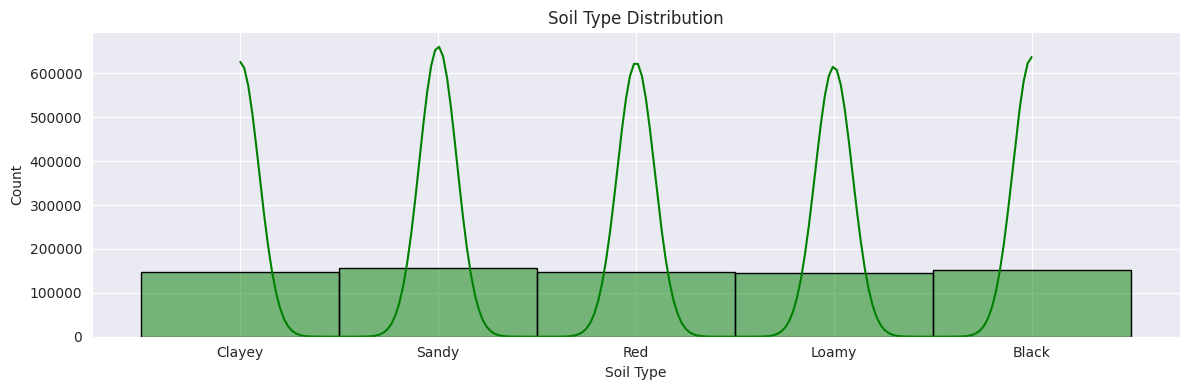

In [16]:
detail_columns(
    fertilizers_train,
    "Soil Type",
    "Soil Type Distribution"
)

We found a categorical variable, with values distributed across five categories representing different soil types. Sandy soil represents the largest number of samples, although in general, the samples are fairly evenly distributed across the five unique values. The variable does not present any null or erroneous data.

## Crop Type

When selecting the right fertilizer for a specific crop, it is important to consider its nutritional needs, soil characteristics, and the desired outcome. Cereal crops, such as wheat, rice, and corn, generally benefit from NPK fertilizers, while legumes, such as lentils and chickpeas, may require phosphate-rich fertilizers. Fruits and vegetables, such as tomatoes and potatoes, often require micronutrient-enriched fertilizers, and oilseeds, such as mustard and sunflower, may require sulfur-based options.

- Cereal Crops (Wheat, Rice, Maize): These crops have a high demand for nitrogen (N) for vegetative growth and phosphorus (P) for root development. NPK fertilizers, like Shriram Supravet, are often recommended to ensure a balanced supply of these nutrients.

- Pulses (Lentils, Chickpeas, Soybeans): Pulses need phosphorus (P) for root nodulation and nitrogen fixation. Phosphate-rich fertilizers and biofertilizers are suitable choices.

- Fruits and Vegetables (Tomatoes, Potatoes, Mangoes): These crops require a variety of micronutrients for optimal fruit quality and disease resistance. Micronutrient-enriched fertilizers like Shriram Ultrazib can be beneficial.

- Oilseeds (Mustard, Groundnut, Sunflower): Sulfur (S) is crucial for oil synthesis in oilseed crops. Sulfur-based fertilizers are often used to ensure adequate sulfur supply.

Variable:  Crop Type 
Format:  object 
Number of null values:  0 
Unique values:  11 
Distribution of values: 
 Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64


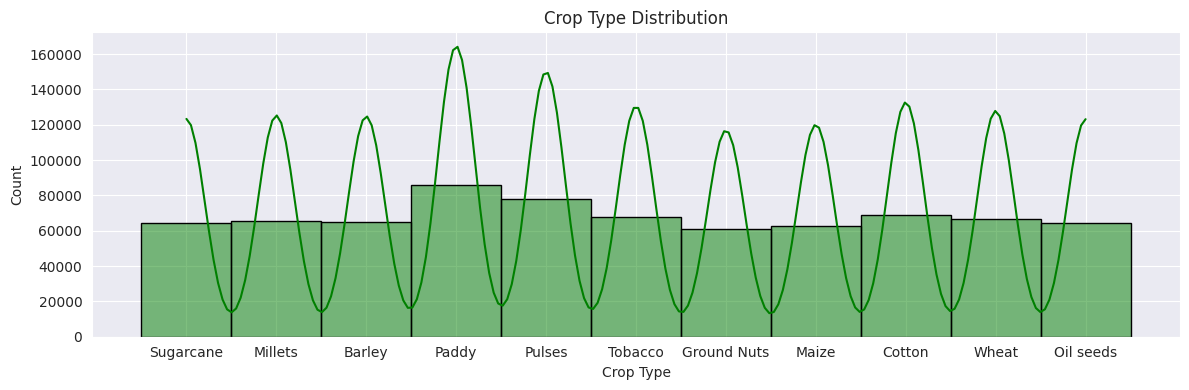

In [17]:
detail_columns(
    fertilizers_train,
    "Crop Type",
    "Crop Type Distribution"
)

We found the second categorical feature, with a distribution of eleven different crop classes, with the 'Paddy' crop having the largest number of samples, followed by 'Pulses'. The other categories contain the same number of samples on average. We found no null or erroneous data present.

## Nitrogen

Nitrogen-rich fertilizers promote rapid vegetative growth and a healthy green color. Different nitrogen sources have different release rates and loss potential, so understanding the needs of plants and soil is crucial. Selecting a fertilizer, the amount, and the form of nitrogen are key factors. Nitrogen measurements are commonly expressed as concentration, using units such as mg/L (milligrams per liter), ppm (parts per million), or mg/kg (milligrams per kilogram), depending on whether the sample is liquid or solid. When measuring nitrogen in water, mg/L is frequently used, while mg/kg is more common for soil or sediment. In some cases, units such as scf (standard cubic feet) or Nm³ (normal cubic meters) may be used to measure the volume of gas, especially when dealing with compressed nitrogen.

Variable:  Nitrogen 
Format:  int64 
Number of null values:  0 
Unique values:  39 
Distribution of values: 
 Nitrogen
25    20484
11    20283
38    20269
26    20177
24    20122
42    19910
27    19843
16    19746
21    19623
18    19578
40    19532
17    19459
35    19435
22    19431
33    19396
37    19320
34    19315
12    19313
19    19304
15    19272
30    19270
6     19149
36    19145
7     19105
29    19061
8     18981
4     18956
41    18865
28    18847
13    18805
14    18769
32    18739
20    18683
39    18573
31    18511
23    18452
9     18332
10    18112
5     17833
Name: count, dtype: int64


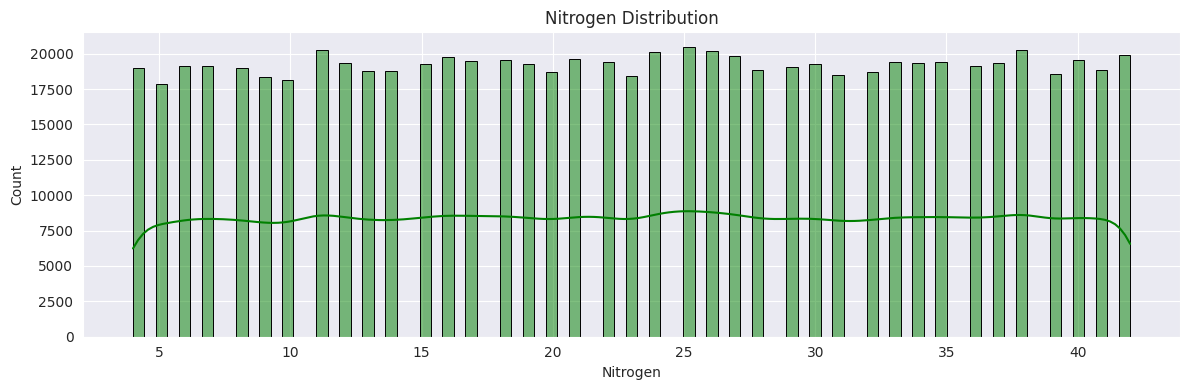

In [18]:
detail_columns(
    fertilizers_train,
    "Nitrogen",
    "Nitrogen Distribution"
)

Once again, we find a nearly normal distribution, with the mean and average within the same value of 23 (assuming milligrams per liter). The values ​​range from 4 to 42, with 39 distinct values, and no outliers. The variable does not present any null or erroneous data.

## Potassium

It is essential for plant health, stress resistance, and crop quality. When choosing a fertilizer, it is important to understand the specific needs of plants and the potassium levels in the soil. In the context of fertilizers, potassium content is typically expressed as K₂O (potassium oxide). While K₂O does not exist as a compound in fertilizer or plants, it is the standard unit used to indicate the relative amount of potassium. Soil and plant tissue tests may indicate potassium as the element K (potassium), but fertilizer recommendations are consistently expressed as K₂O. Potassium is a crucial macronutrient for plants, similar to nitrogen and phosphorus, and plays a vital role in fertilizer selection.

Variable:  Potassium 
Format:  int64 
Number of null values:  0 
Unique values:  20 
Distribution of values: 
 Potassium
0     39060
3     38762
9     38533
14    38292
11    38207
8     38164
15    37997
13    37930
4     37701
16    37691
1     37328
18    37173
6     36953
12    36796
17    36761
10    36747
2     36697
7     36671
19    36583
5     35954
Name: count, dtype: int64


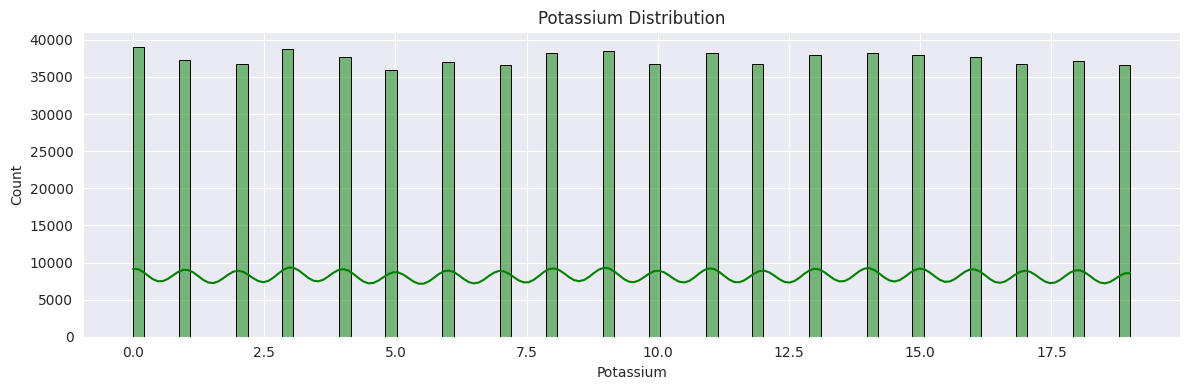

In [19]:
detail_columns(
    fertilizers_train,
    "Potassium",
    "Potassium Distribution"
)

As with all variables, we continued to find a nearly normal distribution, in this case with a mean and average of around 9.0. The values ranged from 0 to 19, and again, we found no extreme values. We found a high presence of zero values, with the largest number of samples being the possible lack of potassium present in some fertilizers. Overall, the values were similar in the number of samples within a short range. No null or erroneous data were detected.

## Phosphorous

When choosing a fertilizer, phosphorus content, often represented by the "P" in NPK (nitrogen, phosphorus, and potassium) ratios, plays a key role in meeting plant needs, especially during the budding and flowering stages. Phosphorus in fertilizer formulations is crucial, particularly for root development, early growth, and flowering. It is measured and labeled as %P₂O₄, which represents phosphate. While fertilizer does not contain pure P₂O₄, this notation is a standard way to indicate the amount of phosphorus present. To obtain the actual percentage of phosphorus, multiply the P₂O₄ percentage by 0.436.

Variable:  Phosphorous 
Format:  int64 
Number of null values:  0 
Unique values:  43 
Distribution of values: 
 Phosphorous
24    19137
22    18633
18    18560
15    18540
39    18385
25    18260
26    18189
40    18009
0     17976
29    17941
17    17900
33    17786
28    17770
9     17761
14    17753
23    17732
21    17644
7     17614
12    17593
4     17490
34    17467
41    17455
27    17442
30    17338
20    17318
35    17246
16    17114
3     17101
42    17097
1     17086
11    17078
37    17001
31    16989
38    16944
10    16914
13    16843
2     16790
5     16775
32    16642
19    16417
36    16215
8     16072
6     15983
Name: count, dtype: int64


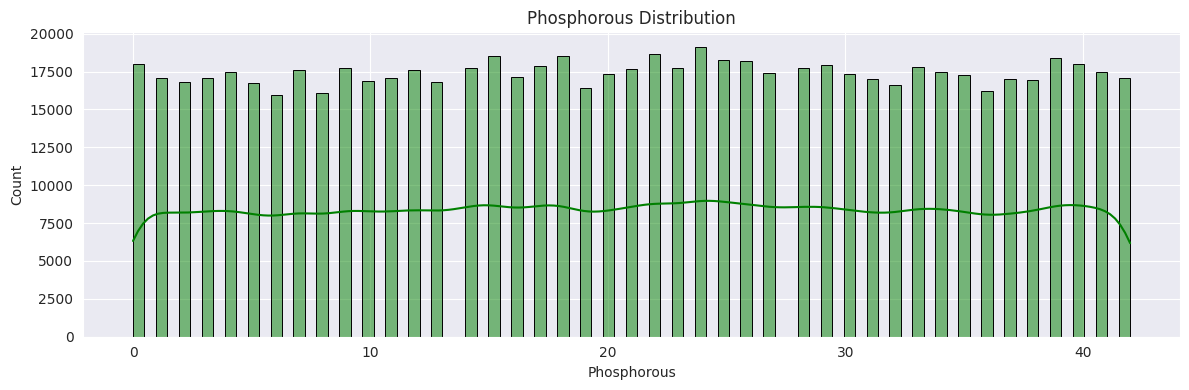

In [20]:
detail_columns(
    fertilizers_train,
    "Phosphorous",
    "Phosphorous Distribution"
)

The same distribution pattern is maintained for the previous variables, with a mean and average of around 21.0. The values are distributed across 43 unique values, within a range of 0.0 to 42.0, with no outliers or extremes. The samples fall within the same range for all values. We found no null or erroneous data.

## Notes

- We did not find any null or erroneous data present in any variable. We will double-check this in the data management process, as well as the possible presence of duplicate data.

- All variables exhibit a near-normal distribution, with no outliers detected at this time. Although we could extend this analysis to corroborate the information with box plots.

- By analyzing not only the content of the variables but also the information they provide and what they cover, we were able to establish certain relationships, such as soil moisture or temperature, as well as with the different types of crops, and with the different elements. A correlation analysis would be important to determine if these linear relationships are present in the data.

- We did not find necessary to perform data cleaning. A feature engineering process could be a next step before asking some interesting questions and exploring the data in more depth.

# Data wrangling

Next, we will perform data Cleaning, if necessary. From our exploratory analysis, we observed that the data does not require extensive clean, as we have not detected any erroneous or null data so far, and we have not observed any extreme values. We will perform a specific check to verify what we saw in the EDA, checking for nulls, duplicates, and outliers.

In [21]:
# We make a copy of the original dataset

fertilizers_new = fertilizers_train.copy()

In [22]:
# We confirm that there is no null values

null_values = pd.DataFrame(
        {f"Null Data" : fertilizers_new.isnull().sum(), 
         "Percentage" : (fertilizers_new.isnull().sum()) / (len(fertilizers_new)) * (100)})

null_values

,Null Data,Percentage
Temparature,0,0.0
Humidity,0,0.0
Moisture,0,0.0
Soil Type,0,0.0
Crop Type,0,0.0
Nitrogen,0,0.0
Potassium,0,0.0
Phosphorous,0,0.0
Fertilizer Name,0,0.0


In [23]:
# We check for duplicate data

print(f"Length: {len(fertilizers_new.duplicated())}")
print(f"Duplicates: {fertilizers_new.duplicated().sum()}")

Length: 750000
Duplicates: 0


We can confirm that the data does not present null values or duplicates.

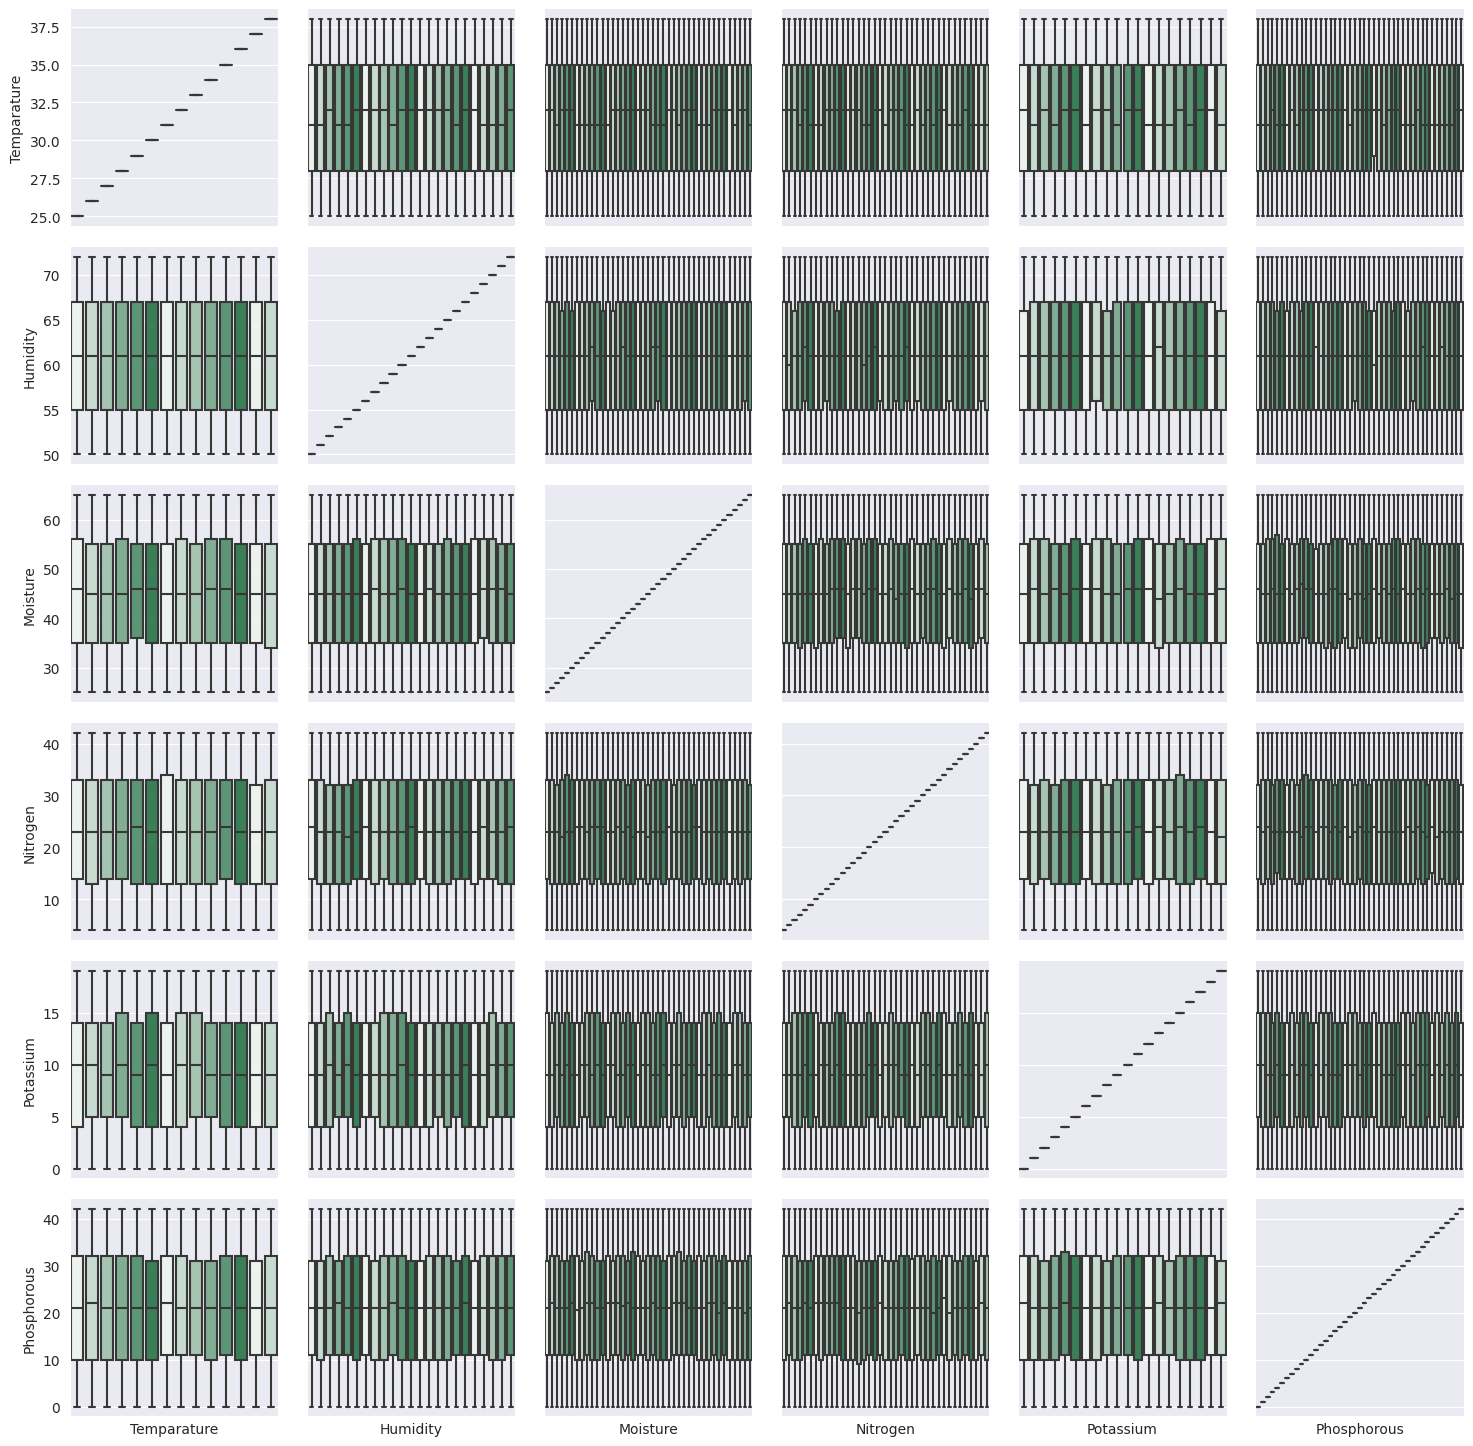

In [24]:
eval_out = sns.PairGrid(fertilizers_new, palette=sns.light_palette("seagreen"))
eval_out.map(sns.boxplot)
eval_out.tick_params(axis="both", labelbottom=False)

Regarding outliers, or the presence of extremes in the data, we can corroborate what we observed in the EDA regarding the distribution of each feature. We could apply an adjustment to all variables based on the 95th percentile and the respective 5th percentile, but we'll leave the data as is and proceed to ask some interesting questions to explore the data in more depth.